# Introduction:
This task involves predicting employee turnover using a given dataset. The dataset contains various features related to employees, such as age, job level, job satisfaction, salary, and more. The goal is to build predictive models that can accurately classify whether an employee is likely to leave the company (attrition) or not. The task is important for HR departments to identify potential turnover risks and take preventive measures.

### Business Questions:

Can we predict whether an employee is likely to leave the company based on various features?
Which features are most strongly correlated with employee attrition?
What are the key factors contributing to employee turnover?

# Importing Libraries

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading Dataset

In [9]:
data = pd.read_csv("F:\Internship\TechnoHacks\Task1_Employee\Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Exploration

In [64]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [65]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [66]:
data.shape #when you execute data.shape, you'll get a tuple with two values, typically in the format (rows, columns).

(1470, 35)

In [67]:
data.info() #.info() method is used to display a concise summary of a DataFrame or Series. It provides important information about the data,such as the data types of each column, the number of non-null values, and the memory usage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
data.describe() #.describe() method is used to generate various summary statistics for a DataFrame or Series, such as count, mean, standard deviation, minimum, quartiles, and maximum values.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [69]:
data.describe(include = 'all') #.describe() method in Pandas with the include='all' parameter, it provides summary statistics for all columns in a DataFrame, including both numeric and non-numeric (e.g., object) columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [70]:
data.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [71]:
data.dtypes #.dtypes attribute in Pandas is used to retrieve the data types of each column in a DataFrame. It returns a Series with the column names as the index and the corresponding data types as the values

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [72]:
data['Attrition'].value_counts() #The value_counts() method in Pandas is used to count the occurrences of unique values in a specified column of a DataFrame. It's particularly useful for understanding the distribution of values within a categorical column.

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

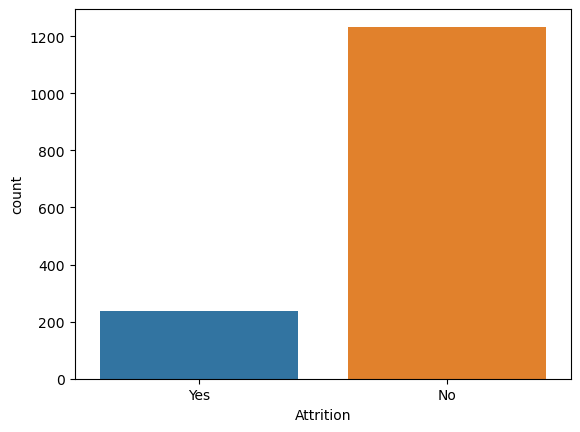

In [73]:
sns.countplot(data=data, x='Attrition')

Here, the distribution is important to consider when building a predictive model. Imbalanced class distributions, where one class significantly outweighs the other, this can impact the model's performance. Here, the "Yes" class (employees who have left) is less common than the "No" class (employees who have not left).

In [74]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [75]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

### Categorical Feature

In [76]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("-----------------------------------------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------------------------------
Gender : ['Female' 'Male']
Male

In [77]:
len(object_col)

7

In [78]:
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

### Numerical Featurs

In [79]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("----------------------------------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
----------------------------------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
----------------------------------------------------
Education : [2 1 4 3 5]
----------------------------------------------------
EnvironmentSatisfaction : [2 3 4 1]
----------------------------------------------------
JobInvolvement : [3 2 4 1]
----------------------------------------------------
JobLevel : [2 1 3 4 5]
----------------------------------------------------
JobSatisfaction : [4 2 3 1]
----------------------------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
----------------------------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
----------------------------------------------------
PerformanceRating : [3 4]
----------------------------------------------------
RelationshipSatisfaction : [1 4 2 3]
--------------------------------

In [80]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("--------------------------------------------")

Age : Minimum: 18, Maximum: 60
--------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
--------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
--------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
--------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
--------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
--------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
--------------------------------------------


# Visualization

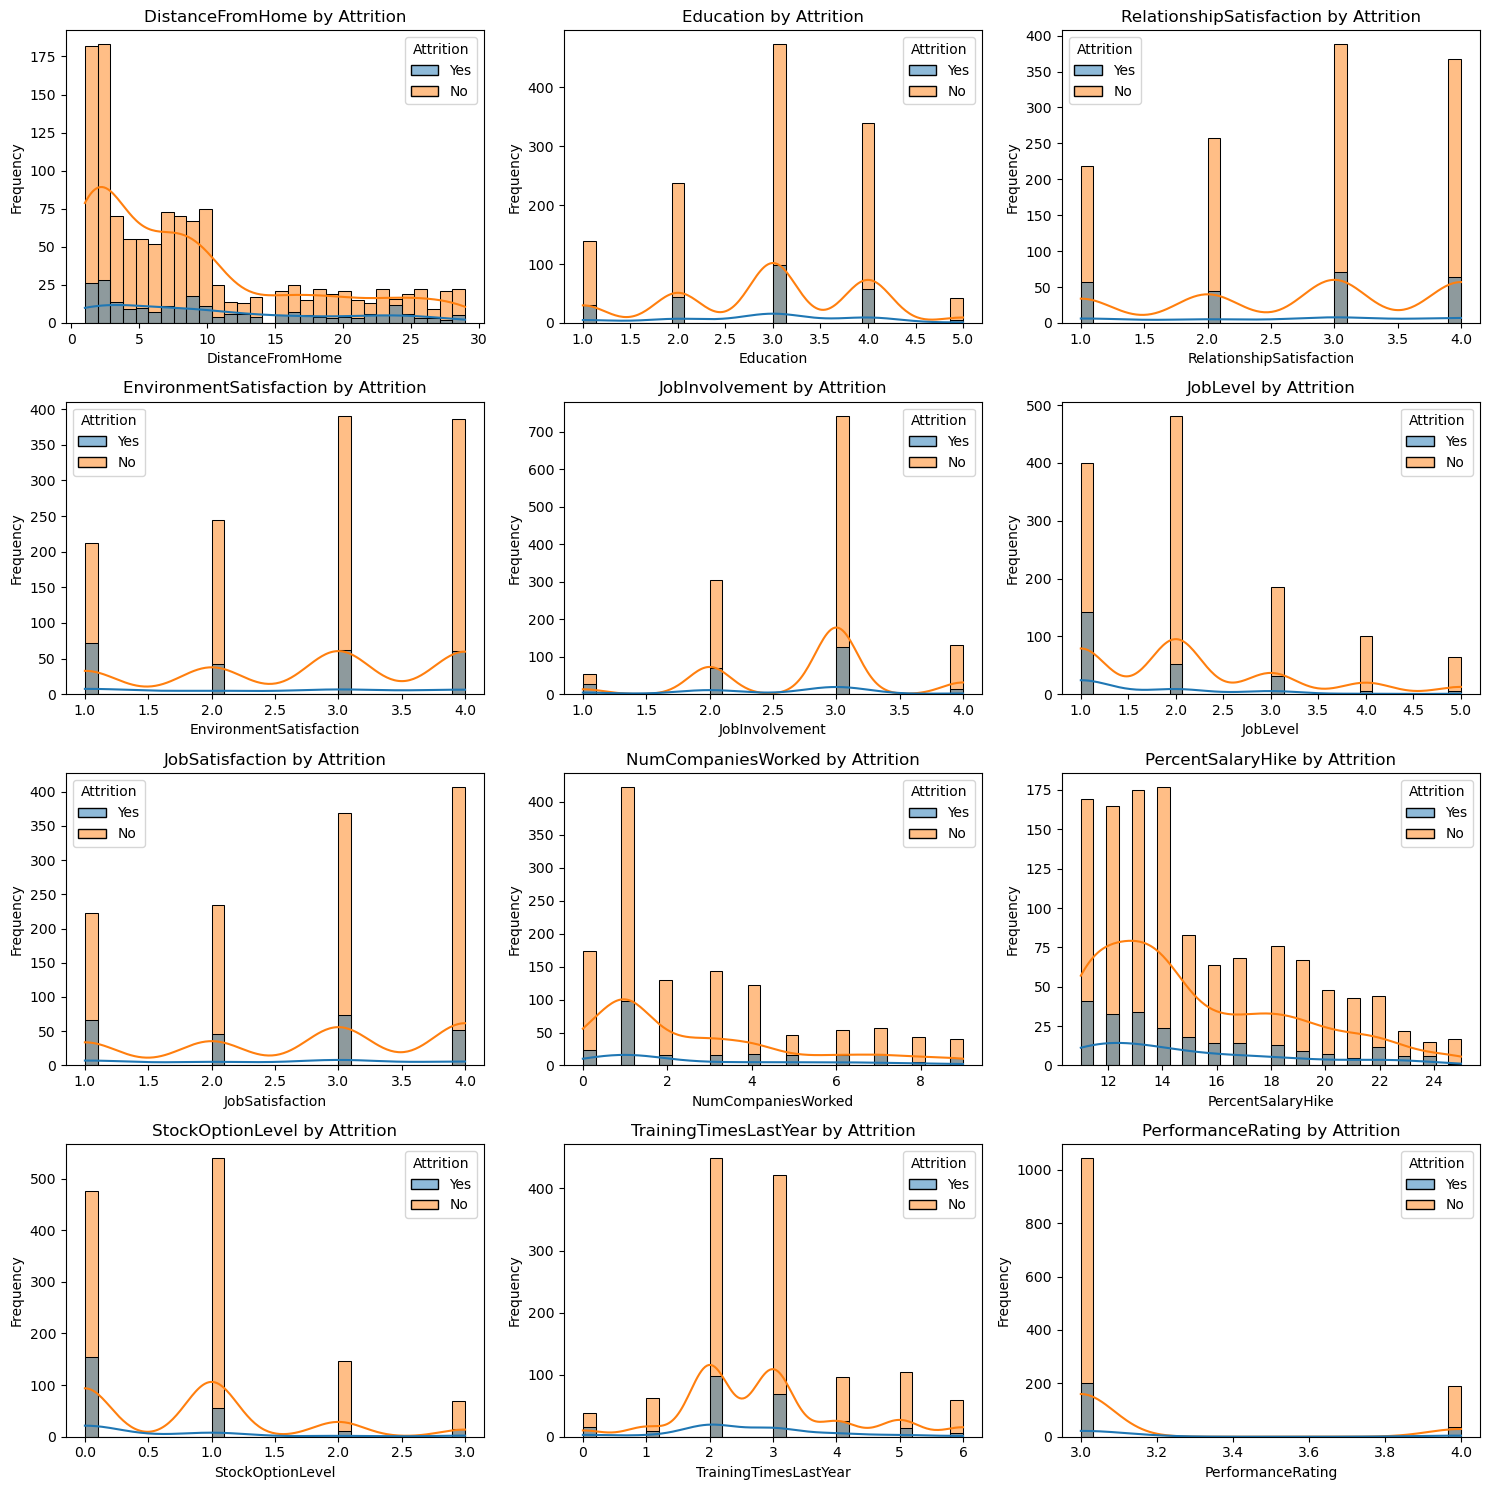

In [12]:
# Columns list for Ploting
columns_to_plot = [
    'DistanceFromHome', 'Education', 'RelationshipSatisfaction', 
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
    'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 
    'StockOptionLevel', 'TrainingTimesLastYear', 'PerformanceRating'
]

# Set the figure size
plt.figure(figsize=(15, 15))

# Loop through the columns and create subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=data, x=column, hue='Attrition', bins=30, kde=True)
    plt.title(f'{column} by Attrition')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Note:** 📌

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees

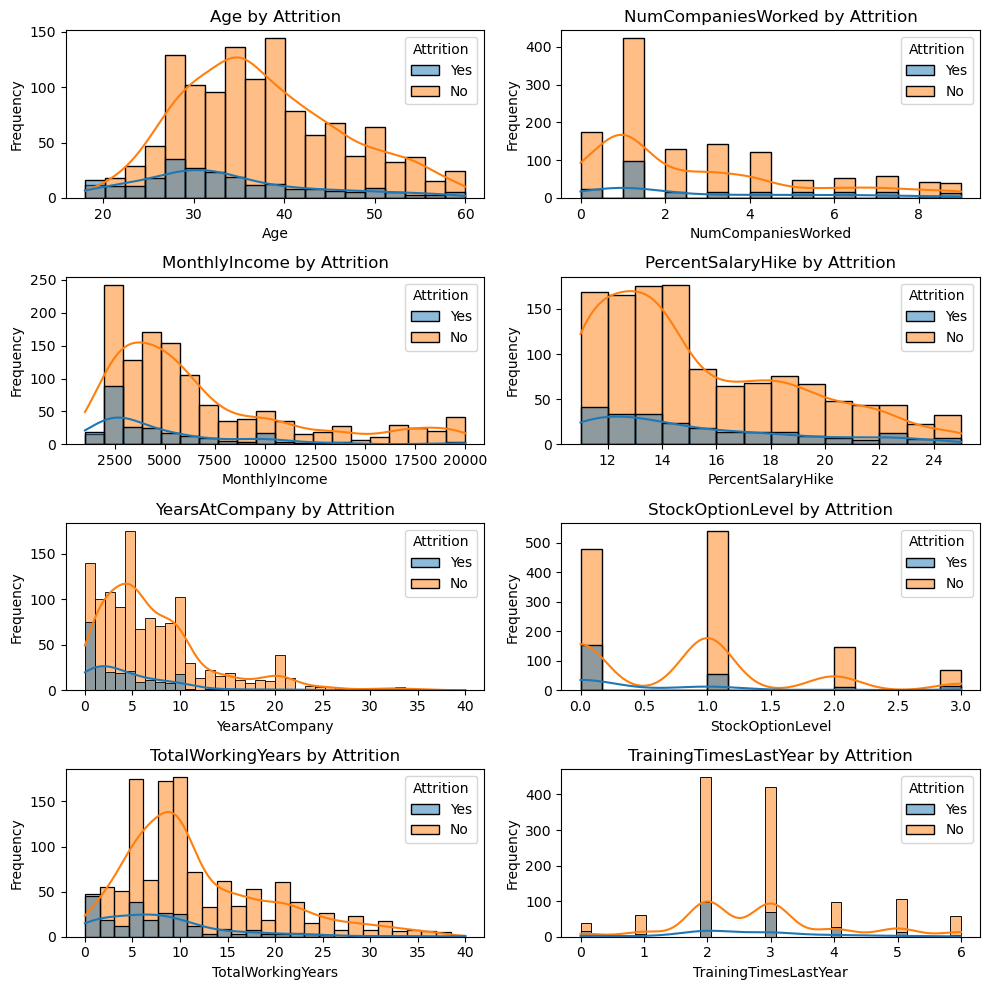

In [13]:
# list of columns to plot
columns_to_plot = [
    ('Age', 35), ('NumCompaniesWorked', None), 
    ('MonthlyIncome', 50), ('PercentSalaryHike', None), 
    ('YearsAtCompany', 35), ('StockOptionLevel', None), 
    ('TotalWorkingYears', 35), ('TrainingTimesLastYear', None)
]

# Set the figure size
plt.figure(figsize=(10, 10))

# Loop through the columns and create subplots
for i, (column, bins) in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=column, hue='Attrition', kde=True)
    plt.title(f'{column} by Attrition')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Discussions:**

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

**Department:** The worker in Research & Development are more likely to stay then the workers on other departement.

**EducationField:** The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

**Gender:** The Male are more likely to quit.

**JobRole:** The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

**MaritalStatus:** The workers who have Single marital status are more likely to quit the Married, and Divorced.

**OverTime:** The workers who work more hours are likely to quit then others.

In [88]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<Axes: >

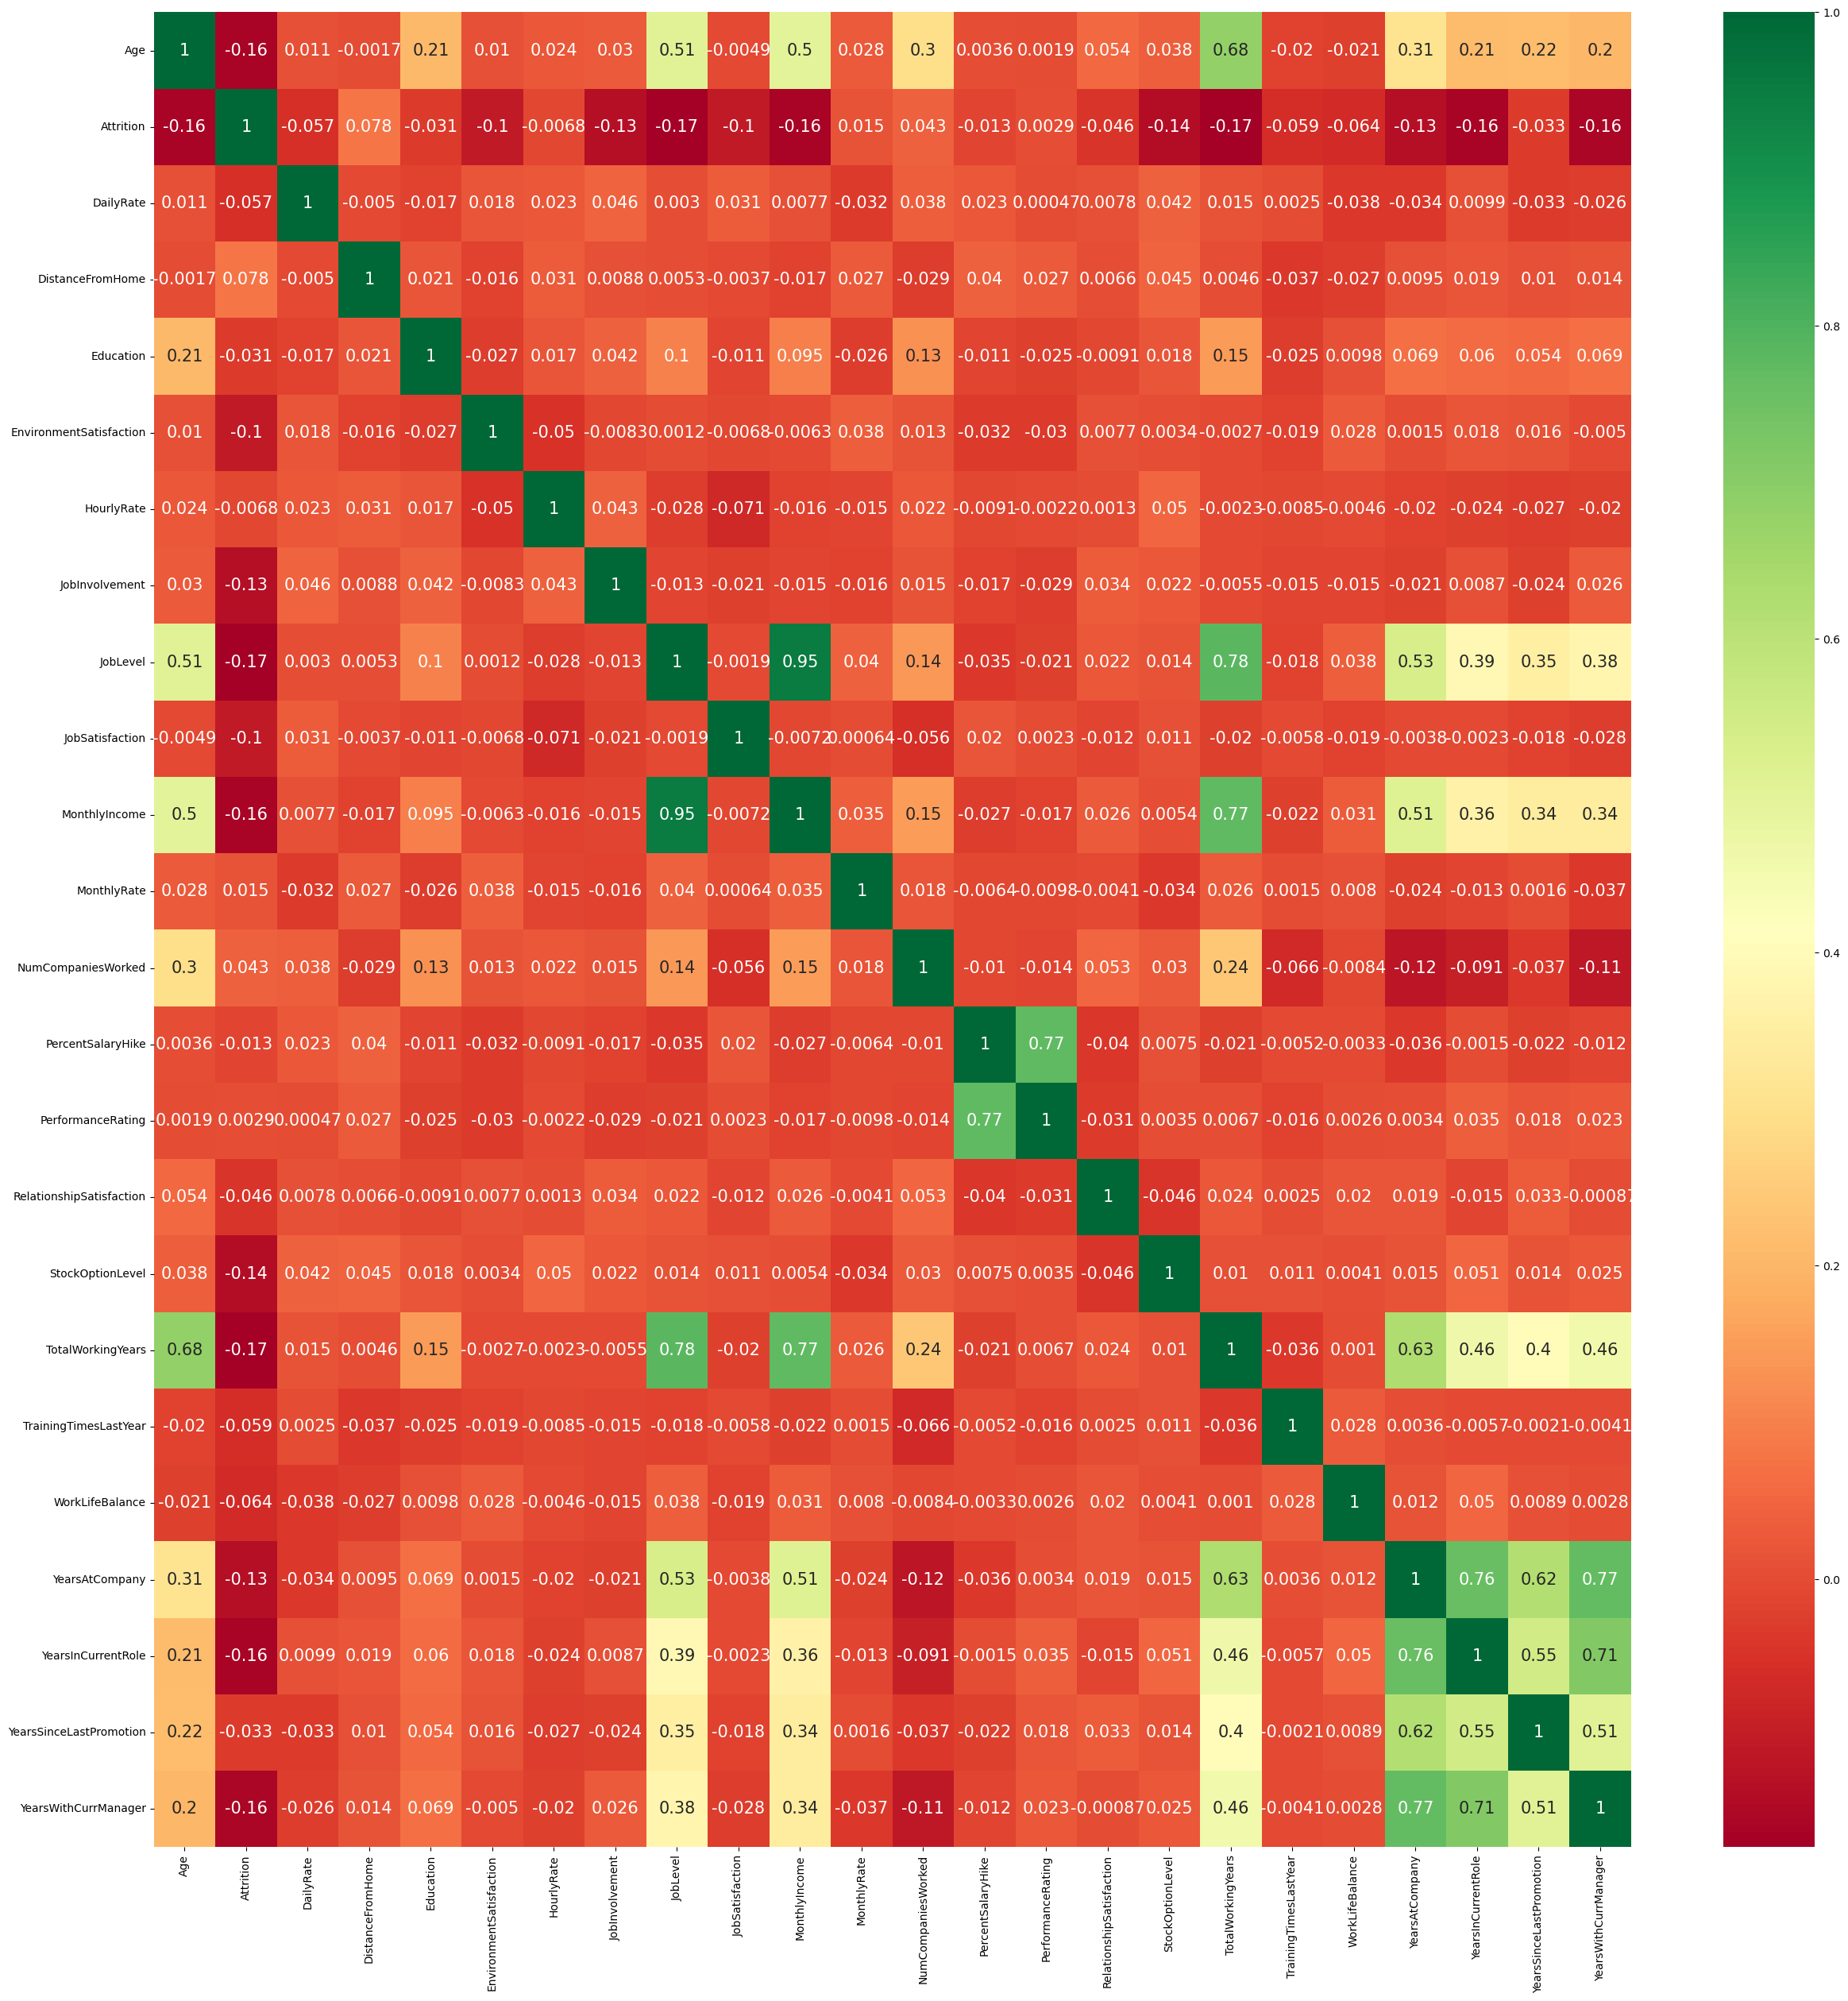

In [89]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

Now, we are going to calculate and display the correlation between each feature in a dataset and target variable. 
Correlation analysis helps us understand the relationships between variables and can provide insights into how different features are related to the target variable.

In [90]:
feature_correlation = data.corr()['Attrition'].sort_values()
feature_correlation

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
Name: Attrition, dtype: float64

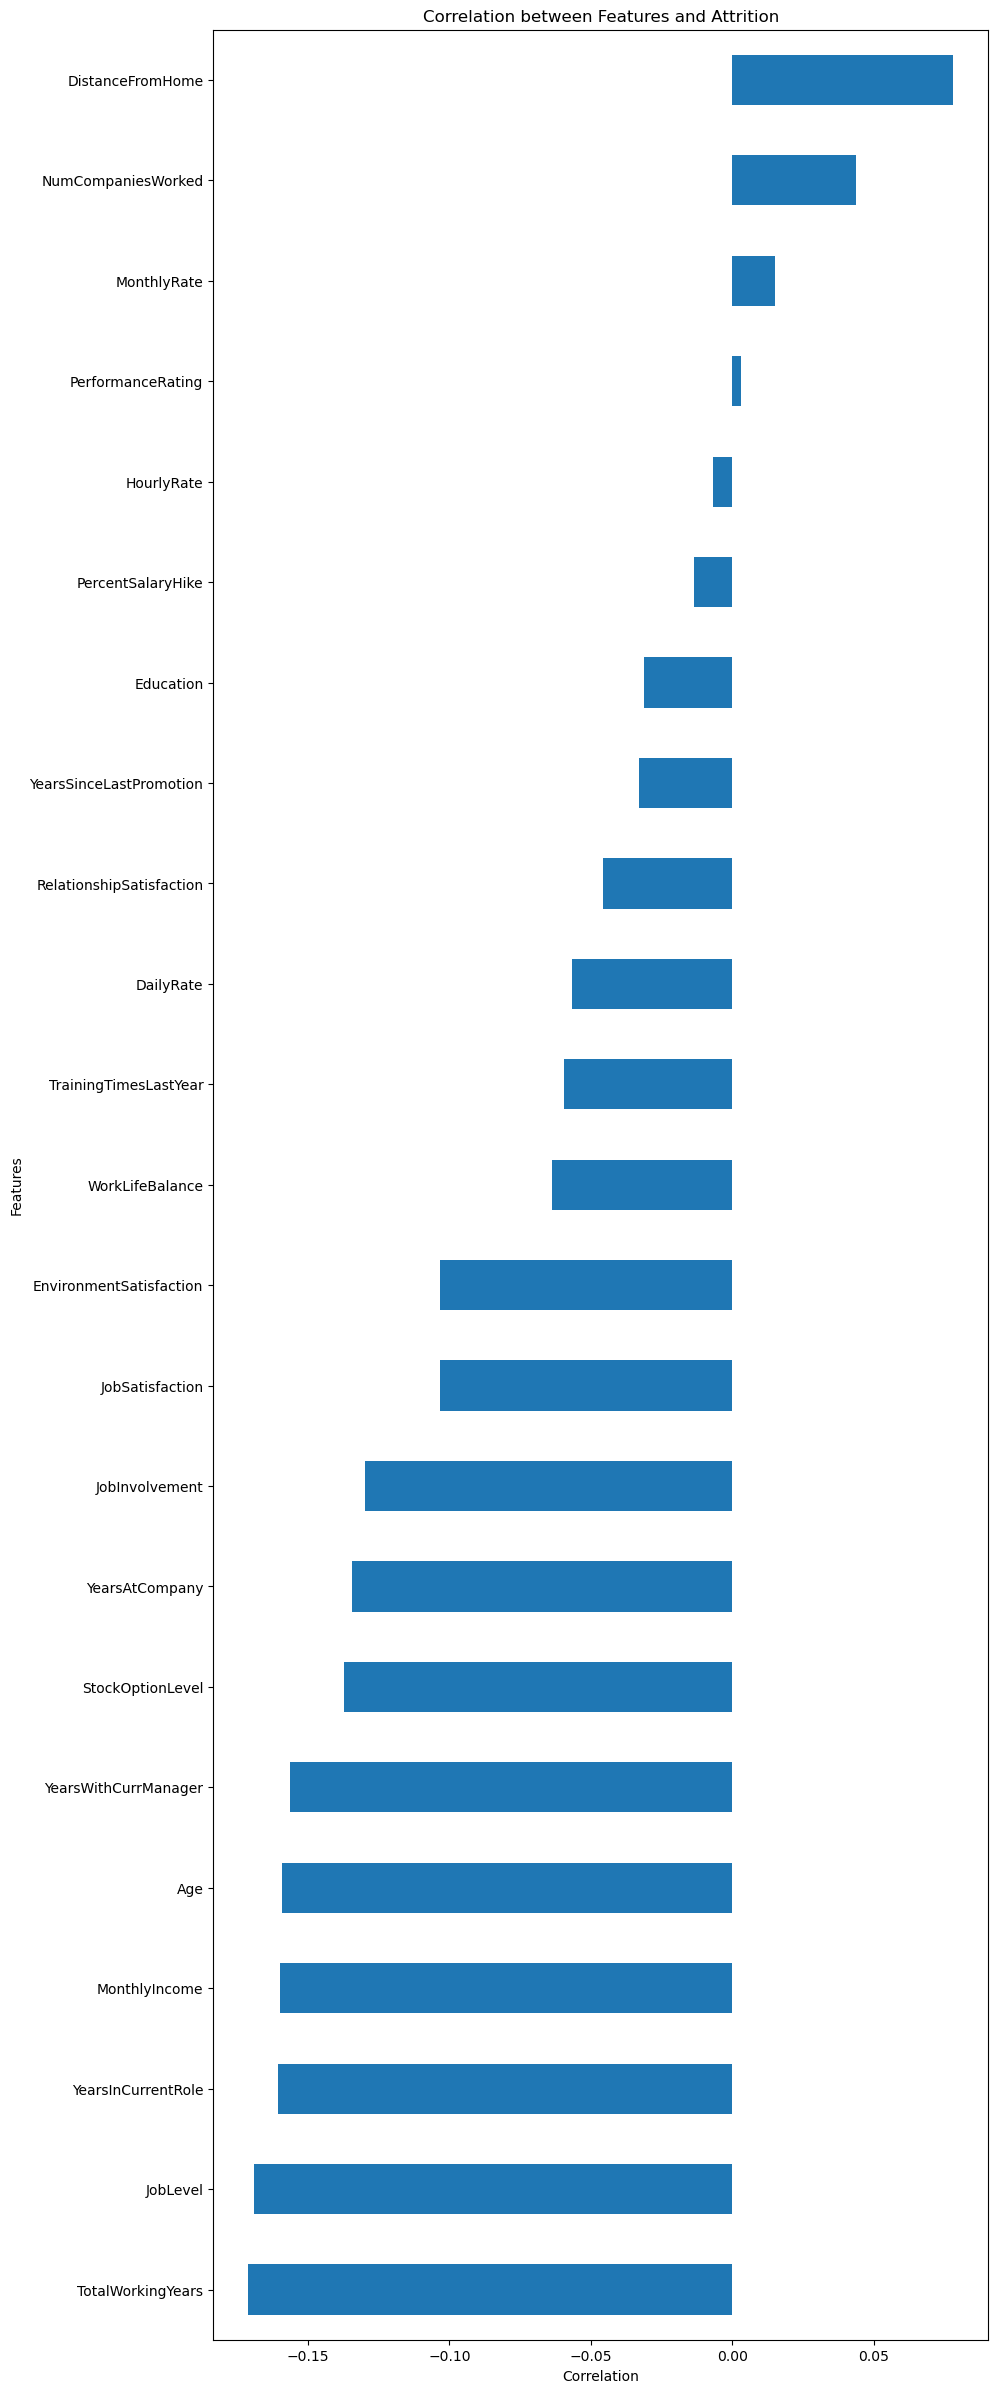

In [91]:
# Calculate the correlation between features and Attrition
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()

# Plot the correlation as a horizontal bar plot
plt.figure(figsize=(10, 30))
feature_correlation.plot(kind='barh')
plt.title('Correlation between Features and Attrition')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

**Analysis of correlation results:**

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

## Handling Missing Values

In [92]:
# Transform categorical data into dummies
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'object' and data[column].nunique() < 20:
        categorical_columns.append(column)

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [93]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 45)
(1470, 45)


In [94]:
data.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rar

### Splitting Dataset

In [95]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

Logistic_Regression_Model = LogisticRegression(solver='liblinear', penalty='l1')
Logistic_Regression_Model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Prediction

In [97]:
y_pred = Logistic_Regression_Model.predict(X_test)

### Evaluation

In [98]:
Logistic_Regression_Model_Accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", Logistic_Regression_Model_Accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8775510204081632

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.59      0.38      0.46        61

    accuracy                           0.88       441
   macro avg       0.75      0.67      0.70       441
weighted avg       0.86      0.88      0.87       441



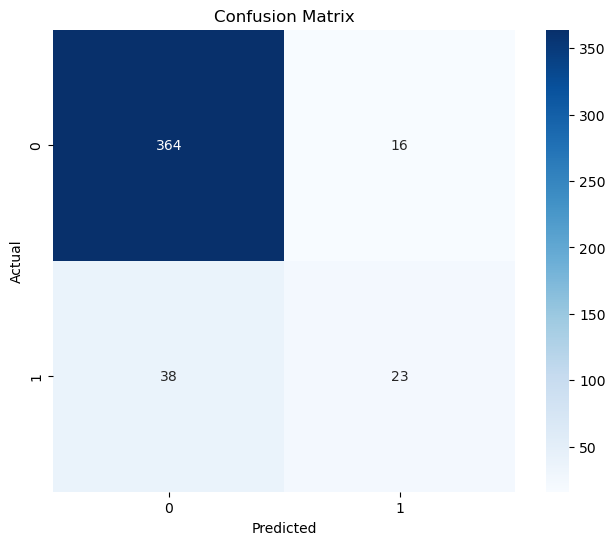

In [109]:
# Calculate the confusion matrix
Logistic_Regression_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Logistic_Regression_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Model

In [117]:
Random_Forest_Model = RandomForestClassifier(random_state=42)
Random_Forest_Model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Prediction

In [118]:
y_pred = Random_Forest_Model.predict(X_test)

### Evaluation

In [119]:
Random_Forest_Model_Accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Accuracy:", Random_Forest_Model_Accuracy)
print("\nClassification Report:\n", class_report)

Test Accuracy: 0.8662131519274376

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



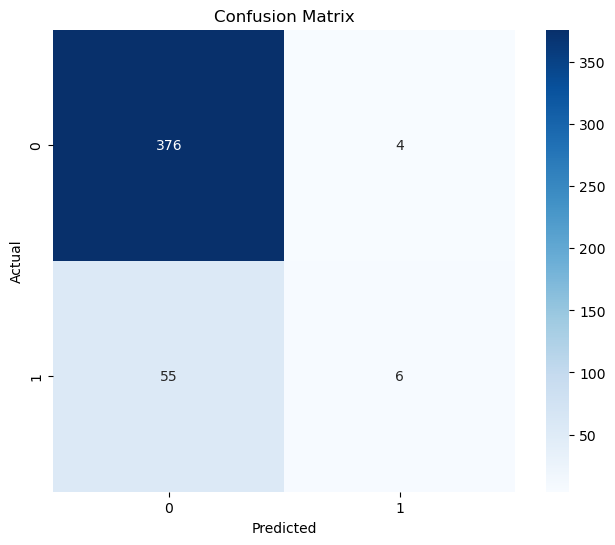

In [120]:
# Calculate the confusion matrix
Random_Forest_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Random_Forest_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Victor Machine

In [121]:
SVM_Model = SVC(kernel='linear', random_state=42)
SVM_Model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Prediction

In [122]:
y_pred = SVM_Model.predict(X_test)

### Evaluation

In [123]:
SVM_Model_Accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Accuracy:", SVM_Model_Accuracy)
print("\nClassification Report:\n", class_report)

Test Accuracy: 0.8526077097505669

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.40      0.13      0.20        61

    accuracy                           0.85       441
   macro avg       0.64      0.55      0.56       441
weighted avg       0.81      0.85      0.82       441



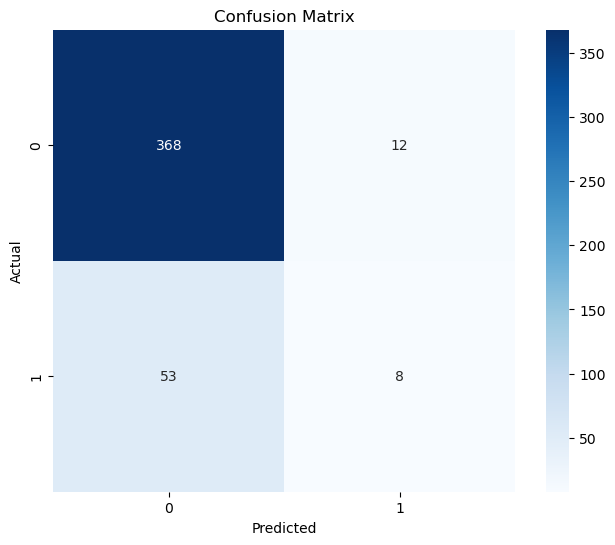

In [124]:
# Calculate the confusion matrix
SVM_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(SVM_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Comparing Logistic Regression VS Random Forest VS SVM

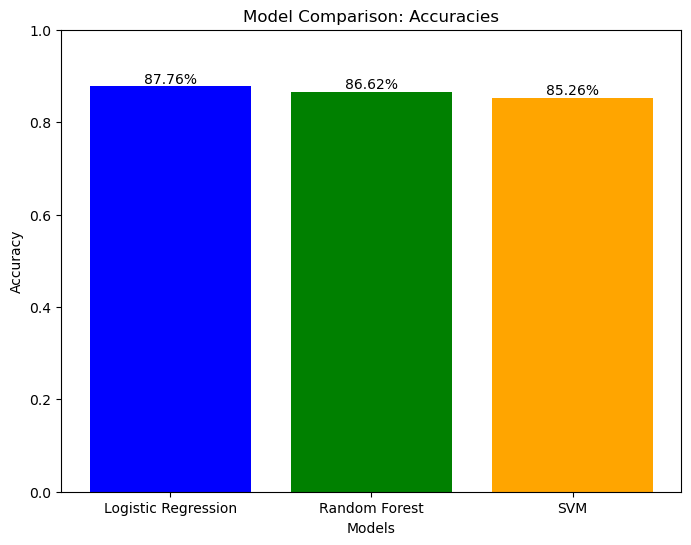

In [125]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [Logistic_Regression_Model_Accuracy, Random_Forest_Model_Accuracy, SVM_Model_Accuracy]

# Create a bar plot with percentage labels
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracies')
plt.ylim([0, 1])  # Set y-axis limit to 0-1

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

plt.show()


**Logistic Regression** achieved the highest accuracy of 87.76%, making it a reliable choice for this task. It provides a good balance between accuracy and simplicity, making it suitable for quick and interpretable predictions.

**Random Forest** followed closely with an accuracy of 86.62%. It offers a more complex approach by combining multiple decision trees, potentially capturing intricate patterns in the data. While it sacrifices some interpretability, it provides competitive accuracy.

**Support Vector Machine (SVM)** attained an accuracy of 85.26%. While slightly behind the other two models in accuracy, SVM's strength lies in handling complex decision boundaries. It could be considered if the data has non-linear relationships that require more advanced modeling.

# Conclusion

In this employee turnover prediction task, we employed three machine learning models: Logistic Regression, Random Forest, and SVM. After thorough data exploration and model evaluation, we found that Logistic Regression achieved the highest accuracy (87.76%), making it a suitable choice for making quick and interpretable predictions. Random Forest closely followed with an accuracy of 86.62%, providing a more complex model that captures intricate patterns. SVM demonstrated an accuracy of 85.26%, showcasing its ability to handle complex decision boundaries. The choice of the best model depends on the specific needs of the HR department and the desired balance between accuracy and interpretability.